In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.optimize import root
from functools import partial
import math
# Davide was here

# Homework CNS Week 2
## Stefan Iacob (s4575121), Bas Krahmer (s4616553), Davide Sabeddu (s1032453)

## Assignment 1
### a)


### b)
<img src="2_1b-1.jpg">

### c)

## Assignment 2
### a)

### b)

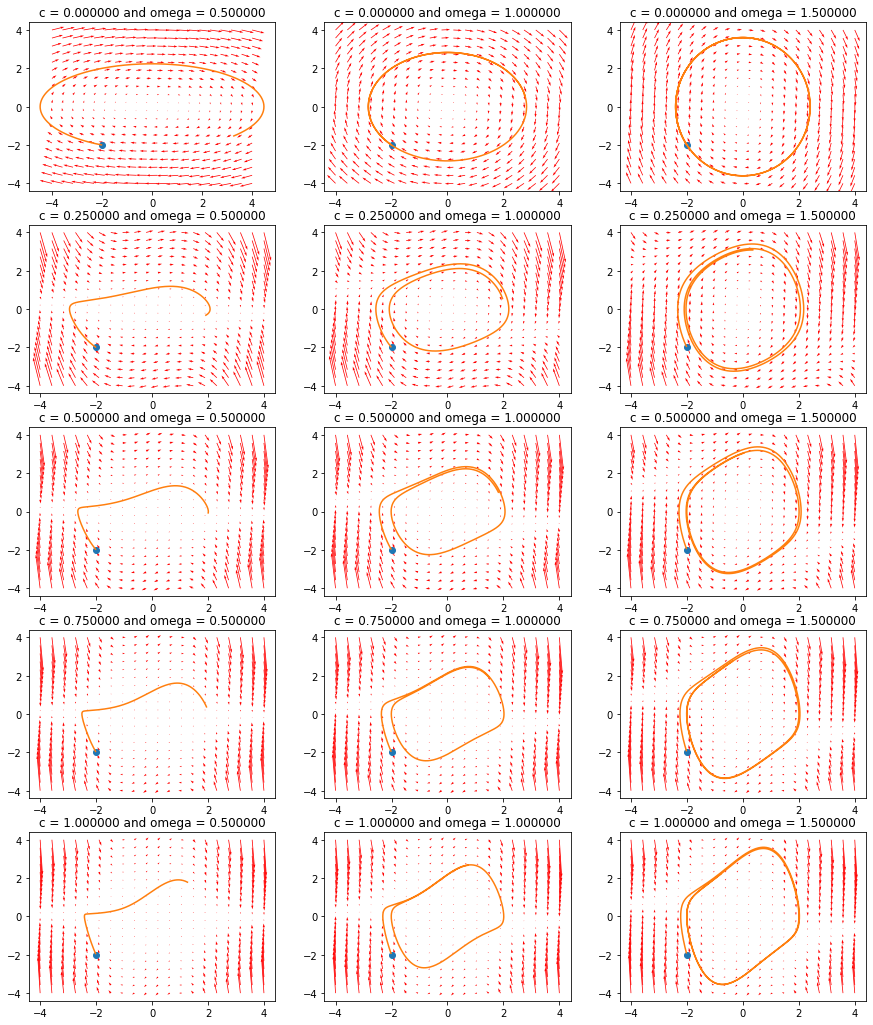

In [111]:
C = [0, 0.25, 0.5, 0.75, 1]
Omega = [0.5, 1, 1.5]
y_start = np.array([-2,-2])
c_i = 0
om_i = 0
f = plt.figure(figsize=(15,18))
for c in C:
    for omega in Omega:
        def dx_dt(x, y, c, omega):
            return y

        def dy_dt(x, y, c, omega):
            return -omega**2 * x - c*(x**2 - 1)*y

        def vdpol(t, x, c, omega):
            y = [dx_dt(x[0], x[1], c, omega), dy_dt(x[0], x[1], c, omega)]
            return np.array(y)

        # code below inspired from http://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/
        ##########################################################################
        y1 = np.linspace(-4, 4, 20)
        y2 = np.linspace(-4, 4, 20)
        Y1, Y2 = np.meshgrid(y1, y2)
        u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
        NI, NJ = Y1.shape
        t = 0
        for i in range(NI):
            for j in range(NJ):
                x = Y1[i, j]
                y = Y2[i, j]
                grad = vdpol(0,[x,y], c, omega)
                u[i,j] = grad[0]
                v[i,j] = grad[1]
        Q = plt.subplot(len(C), len(Omega), om_i + 1)
        Q = plt.quiver(Y1, Y2, u, v, color='r')
        ##########################################################################

        length = 1000
        Y = np.zeros((2,length))
        r = ode(vdpol)
        r.set_f_params(c,omega) # with this line we can incorporate parameter I
        r.set_initial_value(y_start, [0,0])
        for i in range(length):
            Y[:,i] = r.integrate(r.t + np.array([0.01, 0.01]))
        Q = plt.plot(y_start[0], y_start[1], 'o')
        # Plotting nullclines
        Q = plt.plot(Y[0,:], Y[1,:])
        Q = plt.title("c = %f and omega = %f" % (c, omega))
        om_i += 1
    c_i += 1

## Assignment 3

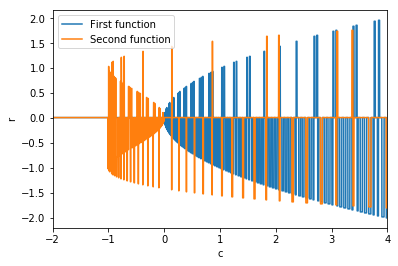

In [64]:
def plot_radius(r_prime, plot_title, theta_prime=2*math.pi):
    c_vals = np.linspace(-6.0, 6.0, 12000)
    r_vals = np.linspace(-2.0, 2.0, 200)
    steady_state_solutions = []
    
    # For all C values
    for c in c_vals:
        r_prime_vals = r_prime(r_vals, c)

        # Find the value where the derivative of r is closest to 0
        solution_index = np.where(r_prime_vals == min(r_prime_vals, key=lambda x:abs(x)))
        solution = r_vals[solution_index]

        steady_state_solutions.append(solution)
        
    plt.plot(c_vals, steady_state_solutions, label=plot_title)
    plt.xlabel('c')
    plt.ylabel('r')
    plt.xlim(-2, 4)
    plt.legend()
    
    return plt


def r_prime1(r, c):
    return r*(c - r**2)

def r_prime2(r, c):
    return r*(c + 2*r**2 - r**4)

plot_radius(r_prime1, 'First function')
plot_radius(r_prime2, 'Second function')
plt.show()